In [87]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, mode
from typing import List
import math

# Функция плотности распределения
def p(x: float) -> float:
    return np.exp(-x) if x >= 0 else 0

# Функция распределения
def F(x: float) -> float:
    return (1 - np.exp(-x)) if x >= 0 else 0

# Обратная функция распределения
def F_inv(y: float) -> float:
    return -np.log(1 - y)

# Генерация выборки
def generate_samples_with_duplicate(n: int) -> List[float]:
    samples = np.random.exponential(1, n - 1)
    duplicate_value = np.random.choice(samples)
    samples = np.append(samples, duplicate_value)
    return samples

# Вычисление моды
def calculate_mode(arr: List[float]) -> float:
    result = mode(arr)
    mode_value = np.array(result.mode).flatten()
    count_value = np.array(result.count).flatten()
    
    if count_value.size > 0 and count_value[0] > 1:  # Если есть хотя бы одно повторяющееся значение
        return mode_value[0]
    else:
        return arr[0]  # Если все элементы уникальны

In [89]:
# Генерация выборки
N = 25
arr = generate_samples(N)

# Вычисление моды, медианы, размаха и коэффициента асимметрии
moda = calculate_mode(arr)
median = np.median(arr)
range_ = np.ptp(arr)
skewness = skew(arr)

print('Мода:', moda)
print('Медиана:', median)
print('Размах:', range_)
print('Оценка коэффициента асимметрии:', skewness)

Мода: 1.4990441570753612
Медиана: 0.6836160313978422
Размах: 4.874566113035739
Оценка коэффициента асимметрии: 2.2933966983864558


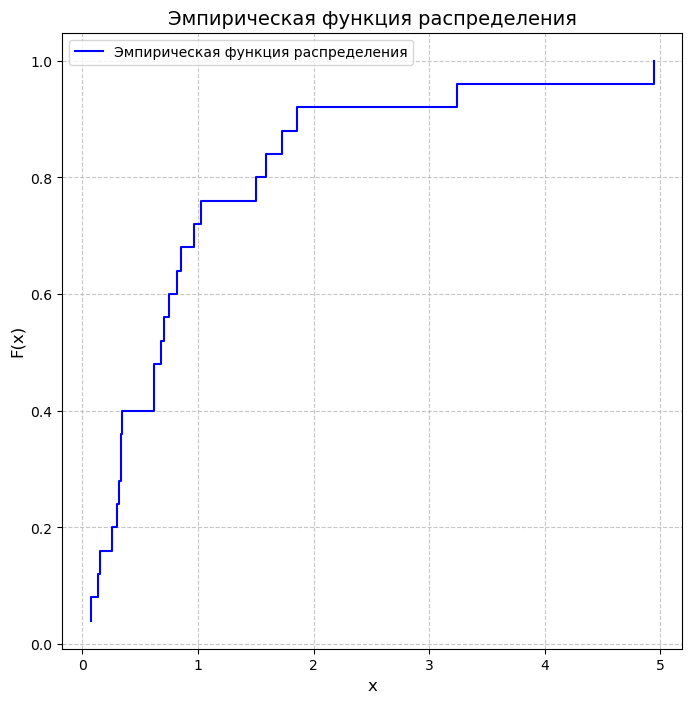

In [91]:
x_vals = np.sort(arr)
y_vals = np.arange(1, N + 1) / N

plt.figure(figsize=(8, 8))
plt.step(x_vals, y_vals, color="b", where="post", label="Эмпирическая функция распределения")
plt.xlabel("x", fontsize=12)
plt.ylabel("F(x)", fontsize=12)
plt.title("Эмпирическая функция распределения", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

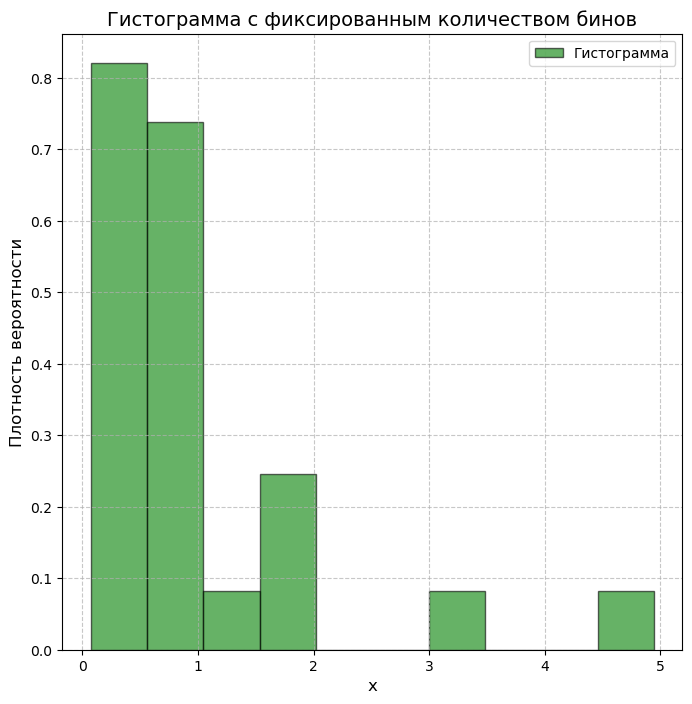

In [93]:
plt.figure(figsize=(8, 8))
plt.hist(
    arr,
    bins=10,  # Фиксированное количество бинов
    alpha=0.6,
    color='g',
    density=True,  # Нормировка гистограммы
    edgecolor='black',
    label='Гистограмма'
)
plt.xlabel('x', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Гистограмма с фиксированным количеством бинов', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

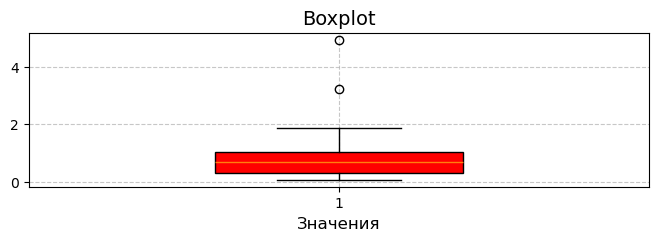

In [95]:
plt.figure(figsize=(8, 2))
plt.boxplot(arr, widths=0.4, patch_artist=True, boxprops=dict(facecolor="r"))
plt.title("Boxplot", fontsize=14)
plt.xlabel("Значения", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

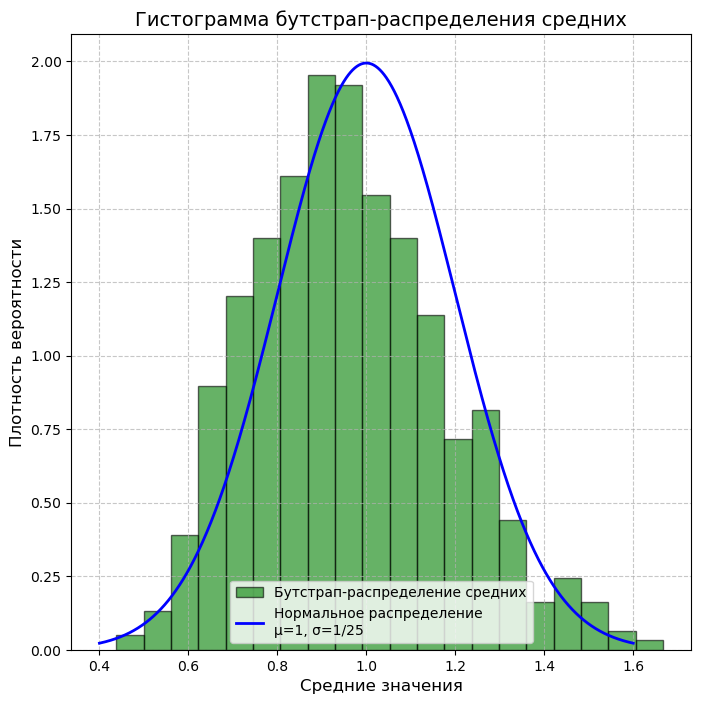

In [97]:
n_iterations = 1000
bootstrap_means = []

for _ in range(n_iterations):
    sample = np.random.choice(arr, size=len(arr), replace=True)
    bootstrap_means.append(np.mean(sample))

mu = 1
sigma = 1/5  # корень из 1/25

x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(8, 8))
plt.hist(
    bootstrap_means,
    bins=20,  # Фиксированное количество бинов
    alpha=0.6,
    color='g',
    density=True,
    edgecolor='black',
    label='Бутстрап-распределение средних'
)
plt.plot(x, y, label=f"Нормальное распределение\nμ=1, σ=1/25", color='blue', linewidth=2)
plt.xlabel('Средние значения', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Гистограмма бутстрап-распределения средних', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

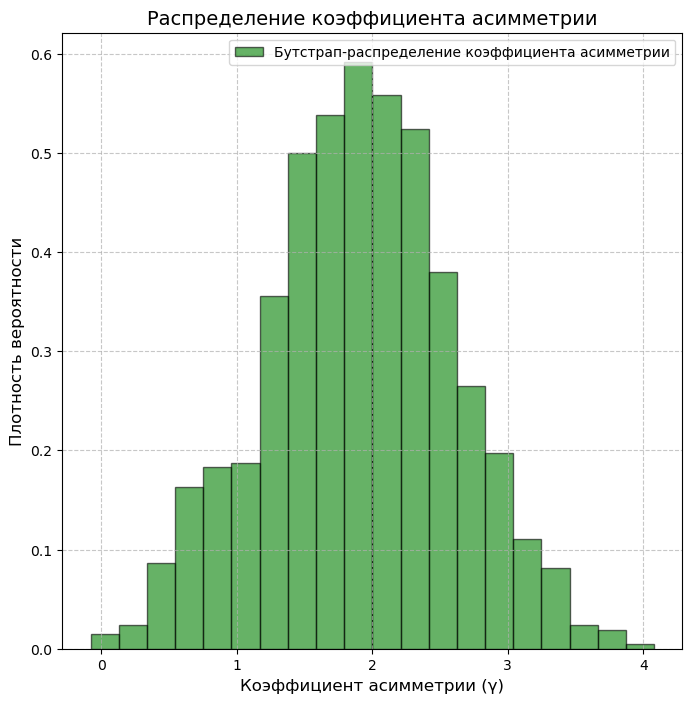

Оценка вероятности того, что коэффициент асимметрии меньше 1: 0.107


In [99]:
bootstrap_asymm = []
for _ in range(n_iterations):
    sample = np.random.choice(arr, size=len(arr), replace=True)
    bootstrap_asymm.append(skew(sample))

plt.figure(figsize=(8, 8))
plt.hist(
    bootstrap_asymm,
    bins=20,  # Фиксированное количество бинов
    alpha=0.6,
    color='g',
    density=True,
    edgecolor='black',
    label='Бутстрап-распределение коэффициента асимметрии'
)
plt.xlabel('Коэффициент асимметрии (γ)', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Распределение коэффициента асимметрии', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()

m = np.sum([1 if bootstrap_asymm[i] < 1 else 0 for i in range(n_iterations)])
print("Оценка вероятности того, что коэффициент асимметрии меньше 1:", m/n_iterations)

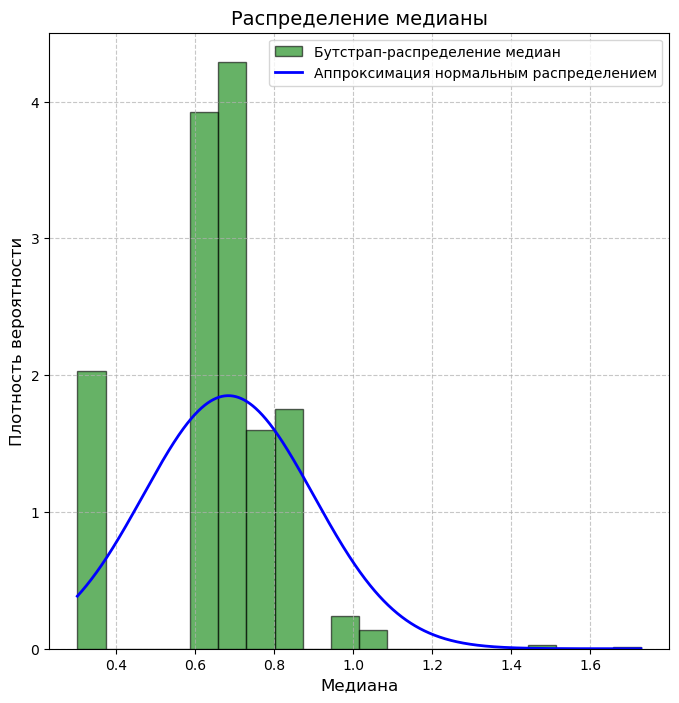

In [101]:
bootstrap_medians = []
for _ in range(n_iterations):
    sample = np.random.choice(arr, size=len(arr), replace=True)
    bootstrap_medians.append(np.median(sample))

x = np.linspace(min(bootstrap_medians), max(bootstrap_medians), 1000)
y = norm.pdf(x, np.median(arr), np.std(arr) / np.sqrt(N))

plt.figure(figsize=(8, 8))
plt.hist(
    bootstrap_medians,
    bins=20,  # Фиксированное количество бинов
    alpha=0.6,
    color='g',
    density=True,
    edgecolor='black',
    label='Бутстрап-распределение медиан'
)
plt.plot(x, y, label="Аппроксимация нормальным распределением", color='blue', linewidth=2)
plt.xlabel('Медиана', fontsize=12)
plt.ylabel('Плотность вероятности', fontsize=12)
plt.title('Распределение медианы', fontsize=14)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()